### Import required library

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read csv to pandas Dataframe

In [115]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [116]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [117]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [118]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

## Data Cleaning

1. Missing values
2. Rename columns
3. Remove duplicated entries

In [119]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [120]:
df.isnull().sum()/len(df)*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

 ### so many null values in the columns 'Unnamed: 2', 'Unnamed: 3' and 'Unnamed: 4', more than 90%
 Lets remove this columns.

In [121]:
df = df.iloc[:,0:2]

In [122]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Rename the columns for better understanding

In [123]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [124]:
df.target.unique()

array(['ham', 'spam'], dtype=object)

Label encoding the target 

In [125]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['target'] = encode.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
# duplicate entries

df.duplicated().sum()

403

In [127]:
df.drop_duplicates(keep='first', inplace=True)

In [128]:
df.shape

(5169, 2)

# Exploratory data Analysis

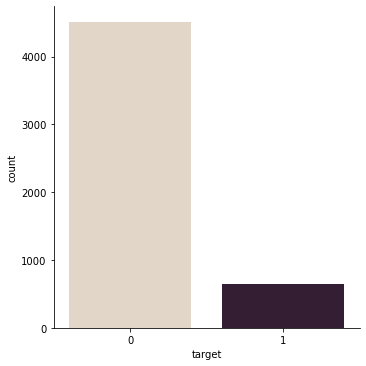

In [129]:
sns.catplot(x="target", kind="count", palette="ch:.25", data=df)
plt.show()

#### _Seems the data has more of 'ham' entries as compared to 'spam' which means data is imbalanced_ 
So i will be oversampling it

In [130]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [131]:
from sklearn.utils import resample

df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples= 4516, random_state=42)

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [132]:
df = df_upsampled

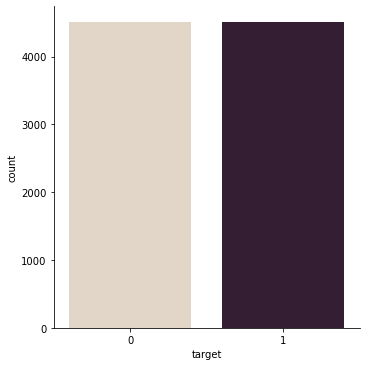

In [133]:
sns.catplot(x="target", kind="count", palette="ch:.25", data=df)
plt.show()

In [134]:
import nltk  #nltk for Text processing

In [135]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIDDHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### making columns for count of characters, words, and sentences in text column

In [136]:

df['char_count'] = df['text'].apply(len)
df.head()

,target,text,char_count
716,1,+449071512431 URGENT! This is the 2nd attempt ...,163
3558,1,URGENT! We are trying to contact U Todays draw...,157
2002,1,TheMob>Yo yo yo-Here comes a new selection of ...,143
747,1,U are subscribed to the best Mobile Content Se...,132
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148


In [137]:
df['words_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,char_count,words_count
716,1,+449071512431 URGENT! This is the 2nd attempt ...,163,31
3558,1,URGENT! We are trying to contact U Todays draw...,157,31
2002,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32
747,1,U are subscribed to the best Mobile Content Se...,132,26
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148,30


In [138]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,char_count,words_count,sentence_count
716,1,+449071512431 URGENT! This is the 2nd attempt ...,163,31,5
3558,1,URGENT! We are trying to contact U Todays draw...,157,31,5
2002,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32,2
747,1,U are subscribed to the best Mobile Content Se...,132,26,2
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148,30,3


In [139]:
df[df.columns[2:]].describe()

,char_count,words_count,sentence_count
count,9032.000000,9032.000000,9032.000000
mean,104.202613,22.337688,2.391497
std,56.439656,11.947964,1.543941
min,2.000000,1.000000,1.000000
25%,49.000000,12.000000,1.000000
50%,115.000000,24.000000,2.000000
75%,152.000000,30.000000,3.000000
max,910.000000,220.000000,38.000000


### Correlation

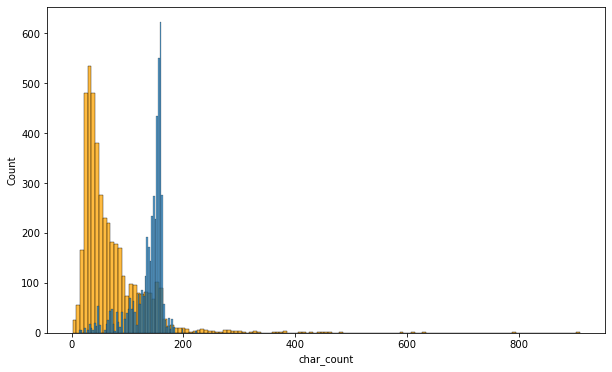

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']== 0]['char_count'], color='orange')
sns.histplot(df[df['target']== 1]['char_count'])
plt.show()

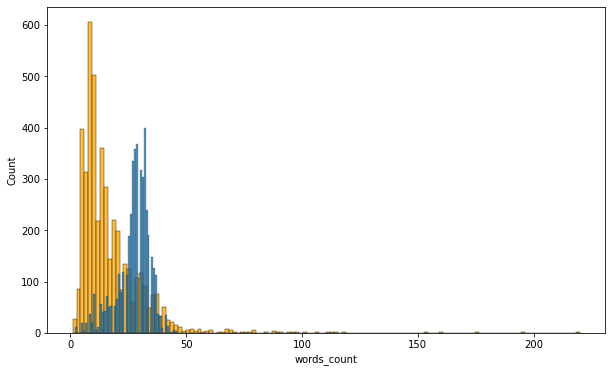

In [141]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']== 0]['words_count'], color='orange')
sns.histplot(df[df['target']== 1]['words_count'])
plt.show()

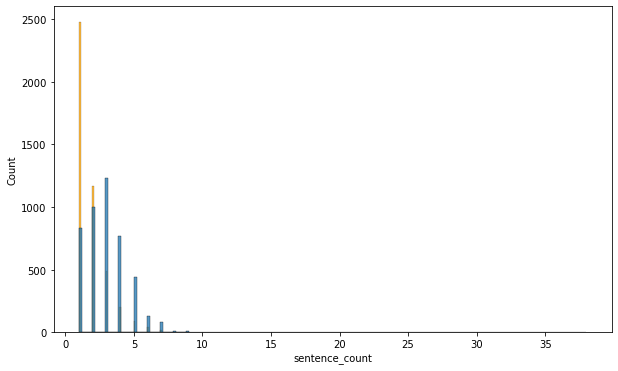

In [142]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']== 0]['sentence_count'], color='orange')
sns.histplot(df[df['target']== 1]['sentence_count'])
plt.show()

### From above we can conclude that the lenth of Spam text is longer than Ham text

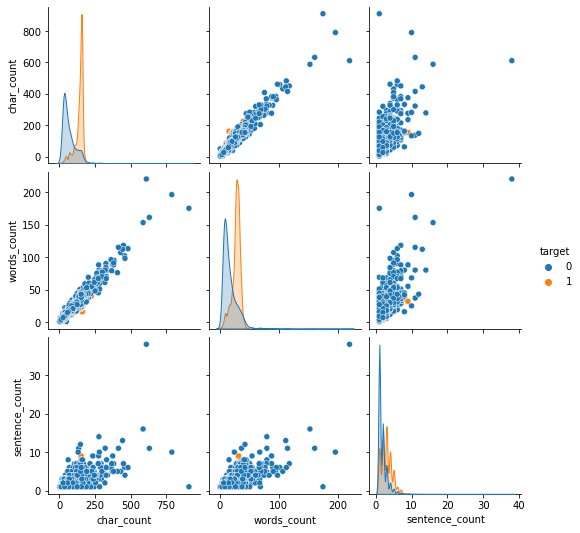

In [143]:
sns.pairplot(df, hue='target')
plt.show()

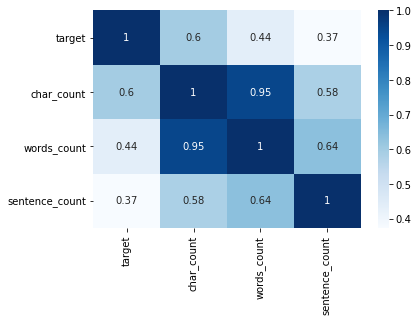

In [144]:
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="Blues")
plt.show()

### from correlation heatmap its seen that some columns have high multicollinearity, which has to be removed.

## Data Pre-Processing

1. Tokenization 
2. Lower case
3. Removing special characters
4. Stemming
5. Removing stopwords and punctuation

In [145]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIDDHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
# Creating a function to do all preprocessing steps required on data

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)
    

In [147]:
df['text'][42]


42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
42    07732584351 - Rodger Burns - MSG = We tried to...
Name: text, dtype: object

In [148]:
transform_text('07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow')

'07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow'

In [149]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,char_count,words_count,sentence_count,transformed_text
716,1,+449071512431 URGENT! This is the 2nd attempt ...,163,31,5,urgent 2nd attempt contact u u call 0907151243...
3558,1,URGENT! We are trying to contact U Todays draw...,157,31,5,urgent tri contact u today draw show prize gua...
2002,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32,2,themob yo yo come new select hot download memb...
747,1,U are subscribed to the best Mobile Content Se...,132,26,2,u subscrib best mobil content servic uk per 10...
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148,30,3,guarante latest nokia phone 40gb ipod mp3 play...


In [150]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [151]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

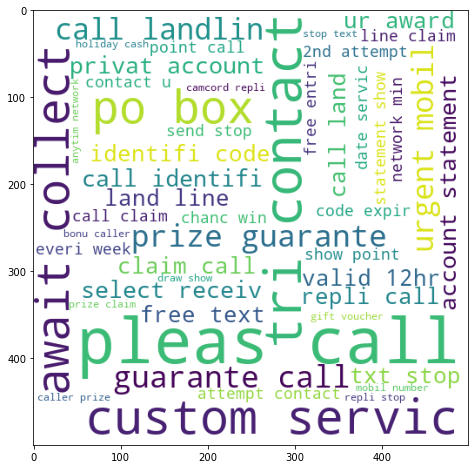

In [152]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [153]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

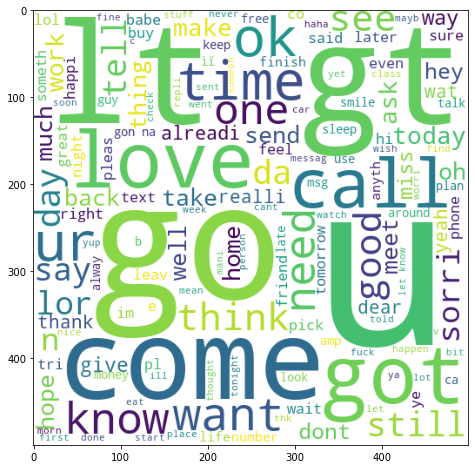

In [154]:
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)

### Most common words

In [155]:
spam_corpus = []

for text in df[df['target']==1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)
        
        

In [156]:
len(spam_corpus)

69058

### Lets analyze the words which is often uses in Spam and Ham text

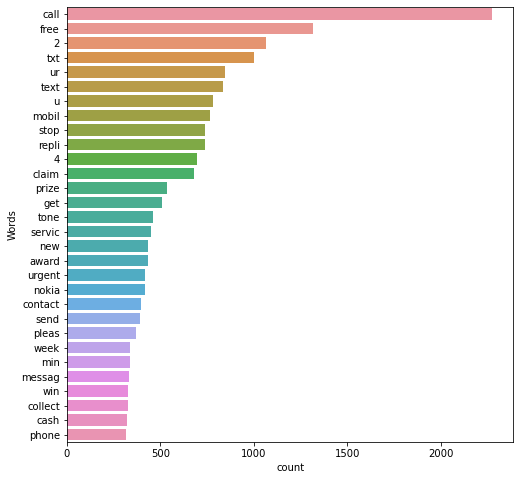

In [157]:
from collections import Counter
plt.figure(figsize=(8,8))
ax = sns.barplot( y=(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]),x=(pd.DataFrame(Counter(spam_corpus).most_common(30))[1]))
ax.set(xlabel='count', ylabel='Words')
plt.xticks(rotation='horizontal')
plt.show()

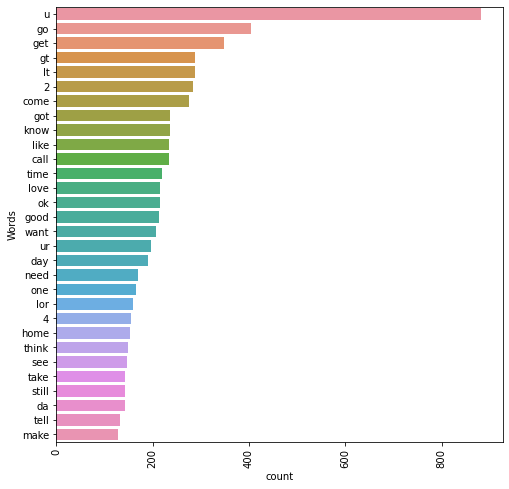

In [158]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


plt.figure(figsize=(8,8))
ax = sns.barplot(y=(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]),x=(pd.DataFrame(Counter(ham_corpus).most_common(30))[1]))
ax.set(xlabel='count', ylabel='Words')
plt.xticks(rotation='vertical')
plt.show()

In [159]:
df.tail()

,target,text,char_count,words_count,sentence_count,transformed_text
5565,0,Huh y lei...,12,4,1,huh lei
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name


## Model Building

### Machine algo need the numerical data to learn it cannot directly learn from alphabetical data so, lets transform the text into vectors with TF-IDF .

In [160]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

#### We only needed the Transformed_text and Target for model building

In [161]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [162]:
X.shape

(9032, 3000)

In [163]:
y= df['target'].values

In [164]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [165]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [166]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [167]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.9845047039291643
0.9826275787187839
[[874  16]
 [ 12 905]]


In [168]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9712230215827338
0.9726775956284153
[[865  25]
 [ 27 890]]


In [169]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9795240730492529
0.997737556561086
[[888   2]
 [ 35 882]]


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [171]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
abc = AdaBoostClassifier(n_estimators=20, random_state=2)
bc = BaggingClassifier(n_estimators=20, random_state=2)
etc = ExtraTreesClassifier(n_estimators=20, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=20,random_state=2)
xgb = XGBClassifier(n_estimators=20,random_state=2)

In [172]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'xgb':xgb,
    'GBDT':gbdt,
    'ETC': etc
}

In [173]:
def train_classifier(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [174]:
accuracy_scores  = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\SIDDHANT\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [175]:
model_score_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision':precision_scores}).sort_values(by='Precision',ascending=False)

model_score_df

,Algorithm,Accuracy,Precision
1,KN,0.980631,1.000000
10,ETC,0.998340,0.997821
5,RF,0.997786,0.996736
0,SVC,0.991699,0.988095
4,LR,0.970116,0.973655
2,NB,0.971223,0.972678
8,xgb,0.935252,0.964037
7,BgC,0.976757,0.957158
9,GBDT,0.884339,0.934889
6,AdaBoost,0.909795,0.929385


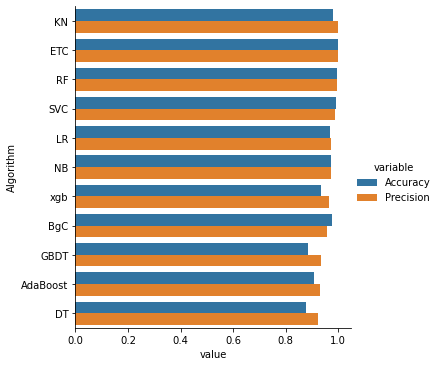

In [176]:
temp = pd.melt(model_score_df, id_vars = "Algorithm")
sns.catplot(x= 'value',y='Algorithm',hue = 'variable',
            data=temp, kind='bar',height=5)
# plt.ylim(0.6,1.0)
plt.xticks(rotation='horizontal')
# plt.yticks(rotation='vertical')
plt.show()

In [177]:
# MultinomialNB

mnb = MultinomialNB( alpha=0.65)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("The accuracy is : ", round(accuracy*100,2))
print("The Precision is : ", round(precision*100,2))

print(classification_report(y_test, y_pred))


The accuracy is :  97.4
The Precision is :  97.39
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       890
           1       0.97      0.97      0.97       917

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



In [184]:
# K Nearest Nebour

knc.fit(X_train, y_train)
y_pred1 = knc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)

print("The accuracy is : ", round(accuracy*100,2))
print("The Precision is : ", round(precision*100,2))

print(classification_report(y_test, y_pred1))

The accuracy is :  98.06
The Precision is :  100.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       890
           1       1.00      0.96      0.98       917

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807



<AxesSubplot:>

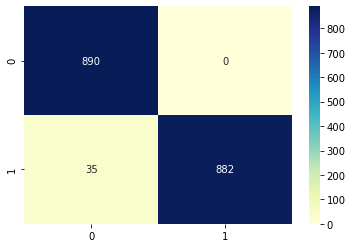

In [185]:
cf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", fmt='g')

In [186]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("The accuracy is : ", round(accuracy*100,2))
print("The Precision is : ", round(precision*100,2))

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

The accuracy is :  99.17
The Precision is :  98.49
--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       890
           1       0.98      1.00      0.99       917

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



<AxesSubplot:>

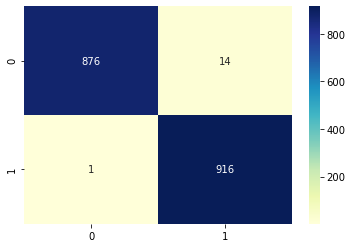

In [187]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", fmt='g')

### Confusion matrix seems pretty good as required.

### Conclusion :
   #### Of all Classifier tested, The RandomForestClassifier was selected for prediction and Deployment.

### Now lets save our model for deployment

In [188]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))